In [1]:
import numpy as np
from cart import CART
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from gradient_boosting import GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
def mse(pred, true):
    pred = np.array(pred)
    true = np.array(true)
    return np.mean((pred - true) ** 2)

In [3]:
X_, y_ = load_boston(True)

In [4]:
X_train_, y_train_ = X_[:400], y_[:400]
X_test_, y_test_ = X_[400:], y_[400:]

In [5]:
my_model_ = GradientBoosting(
    n_estimators=100, learning_rate=0.1, 
    subsamples=1.0, max_depth=5
)
skl_model_ = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1,
    subsample=1.0, max_depth=5,
    criterion='mse'
)

In [6]:
%%time
my_model_.fit(X_train_, y_train_)

100%|██████████| 100/100 [00:04<00:00, 22.74it/s]

CPU times: user 4.41 s, sys: 26.4 ms, total: 4.44 s
Wall time: 4.41 s


In [7]:
%%time
skl_model_.fit(X_train_, y_train_)

CPU times: user 150 ms, sys: 179 µs, total: 150 ms
Wall time: 146 ms


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
%%time
my_pred_ = my_model_.predict(X_test_)

CPU times: user 51.2 ms, sys: 0 ns, total: 51.2 ms
Wall time: 49 ms


In [9]:
%%time
skl_pred_ = skl_model_.predict(X_test_)

CPU times: user 1.42 ms, sys: 46 µs, total: 1.46 ms
Wall time: 1.02 ms


In [10]:
print('my_mse:', mse(my_pred_, y_test_))
print('skl_mse:', mse(skl_pred_, y_test_))

my_mse_g: 21.737384091983856
skl_mse_g: 21.19994158337418


In [11]:
def read_data(file, num_samples, num_features):
    x = np.zeros((num_samples, num_features))
    y = np.empty(num_samples)
    with open(file, 'r') as f:
        for idx, line in enumerate(f):
            data = line.split()
            y[idx] = float(data[0])
            data = data[1:]
            for e in data:
                t = e.split(':')
                f_idx, f_value = int(t[0]), float(t[1])
                x[idx, f_idx-1] = f_value
    return x, y

In [12]:
X_train, y_train = read_data('reg.train.txt', 7200, 245)

In [13]:
X_test, y_test = read_data('reg.test.txt', 10050, 245)

In [14]:
my_model = GradientBoosting(
    n_estimators=1000, learning_rate=0.01, max_features=245,
    subsamples=0.6, max_depth=3, min_leaf_size=100
)
skl_model = GradientBoostingRegressor(
    n_estimators=1000, learning_rate=0.01, max_features=245,
    subsample=0.6, max_depth=3, min_samples_leaf=100,
    criterion='mse', verbose=1
)

In [15]:
%%time
my_model.fit(X_train, y_train)

100%|██████████| 1000/1000 [09:23<00:00,  1.78it/s]

CPU times: user 19min 7s, sys: 12.8 s, total: 19min 20s
Wall time: 9min 23s


In [16]:
%%time
skl_model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.8076           0.0035            1.21m
         2           0.7914           0.0034            1.29m
         3           0.8102           0.0033            1.25m
         4           0.7956           0.0034            1.21m
         5           0.7886           0.0033            1.18m
         6           0.8011           0.0032            1.18m
         7           0.8011           0.0031            1.16m
         8           0.7856           0.0030            1.16m
         9           0.7914           0.0030            1.16m
        10           0.7864           0.0028            1.15m
        20           0.7583           0.0025            1.14m
        30           0.7304           0.0022            1.11m
        40           0.7190           0.0017            1.08m
        50           0.7005           0.0015            1.06m
        60           0.6974           0.0013            1.04m
       

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=245, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [17]:
%%time
my_pred_test = my_model.predict(X_test)

CPU times: user 19.5 s, sys: 0 ns, total: 19.5 s
Wall time: 19.5 s


In [18]:
%%time
skl_pred_test = skl_model.predict(X_test)

CPU times: user 372 ms, sys: 0 ns, total: 372 ms
Wall time: 368 ms


In [19]:
%%time
my_pred_train = my_model.predict(X_train)

CPU times: user 13.5 s, sys: 0 ns, total: 13.5 s
Wall time: 13.4 s


In [20]:
%%time
skl_pred_train = skl_model.predict(X_train)

CPU times: user 217 ms, sys: 0 ns, total: 217 ms
Wall time: 214 ms


In [21]:
print('my_mse_train:', mse(my_pred_train, y_train))
print('skl_mse_train:', mse(skl_pred_train, y_train))

my_mse_train: 0.4685686323113857
skl_mse_train: 0.46927255196483897


In [22]:
print('my_mse_test:', mse(my_pred_test, y_test))
print('skl_mse_test:', mse(skl_pred_test, y_test))

my_mse_test: 0.7709891823814724
skl_mse_test: 0.7741263925591915


In [23]:
import matplotlib.pyplot as plt

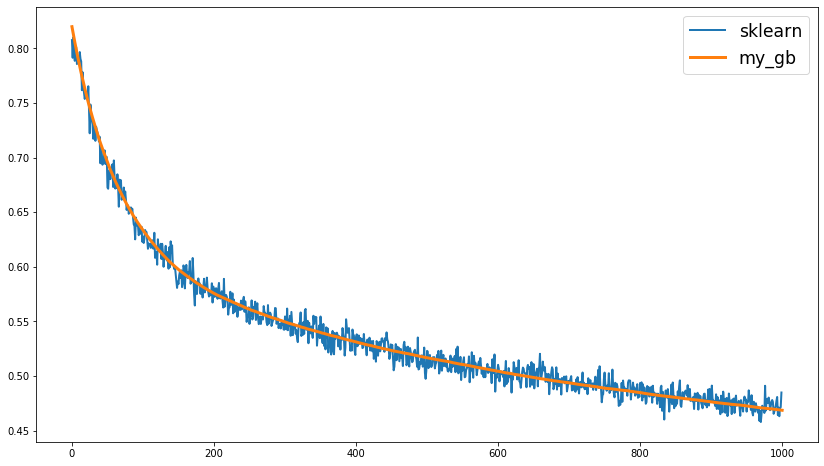

In [24]:
plt.figure(figsize=(14, 8))
plt.plot(skl_model.train_score_, label='sklearn', linewidth=2)
plt.plot(my_model.loss_by_iter, label='my_gb', linewidth=3)
plt.legend(fontsize='xx-large')

In [26]:
a = np.array([-np.inf, 0, np.inf])

In [27]:
a

array([-inf,   0.,  inf])

In [29]:
np.argmax(a)

2